## Determination of relationship between the molecular weight and gyration radius of proteins

It is useful to be able to estimate the radius of a particle based on its molecular weight, as the radius of a particle can be used to calculate an estimated diffusion coefficient of said particle. To that end, this notebook was used to find an equation accurately describing the relationship between the molecular weight of a protein and its gyration radius.

Data from Tyn, M.T. and Gusek, T.W. (1990), Prediction of diffusion coefficients of proteins. Biotechnol. Bioeng., 35: 327-338. https://doi.org/10.1002/bit.260350402

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_excel('protein-mass_vs_gyration-radius.xlsx')
data

,Da,"Radius of gyration, Å"
0,12640,14.8
1,13700,14.8
2,17000,14.8
3,13300,14.5
4,14180,16.7
...,...,...
193,39000000,924.0
194,40000000,924.0
195,40590000,924.0
196,40700000,924.0


## Edit dataframe
- Add columns
- Change units in new columns

In [3]:
kDa = pd.Series(data['Da']/10000)
nm = pd.Series(data['Radius of gyration, Å']/10)

data.insert(1, 'kDa', kDa)
data.insert(3, 'R, nm', nm)
data

,Da,kDa,"Radius of gyration, Å","R, nm"
0,12640,1.264,14.8,1.48
1,13700,1.370,14.8,1.48
2,17000,1.700,14.8,1.48
3,13300,1.330,14.5,1.45
4,14180,1.418,16.7,1.67
...,...,...,...,...
193,39000000,3900.000,924.0,92.40
194,40000000,4000.000,924.0,92.40
195,40590000,4059.000,924.0,92.40
196,40700000,4070.000,924.0,92.40


## Plot data

<AxesSubplot:xlabel='kDa', ylabel='R, nm'>

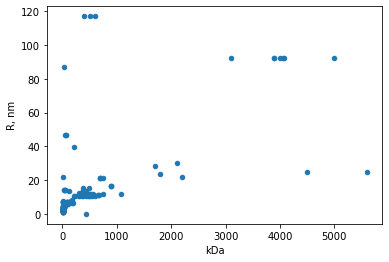

In [4]:
%matplotlib inline

data.plot.scatter('kDa', 'R, nm')

The relationship between the hydrodynamic radius (Rh) and molecular weight (MW) has been described as follows:

Rh ∝ MW^1/3

For a more accurate plot, transform MW data to MW^1/3

In [5]:
kDa_3 = pd.Series(data['kDa']**(1/3))
data.insert(4, 'kDa^1/3', kDa_3)
data

,Da,kDa,"Radius of gyration, Å","R, nm",kDa^1/3
0,12640,1.264,14.8,1.48,1.081224
1,13700,1.370,14.8,1.48,1.110641
2,17000,1.700,14.8,1.48,1.193483
3,13300,1.330,14.5,1.45,1.099724
4,14180,1.418,16.7,1.67,1.123463
...,...,...,...,...,...
193,39000000,3900.000,924.0,92.40,15.740609
194,40000000,4000.000,924.0,92.40,15.874011
195,40590000,4059.000,924.0,92.40,15.951677
196,40700000,4070.000,924.0,92.40,15.966074


<AxesSubplot:xlabel='kDa^1/3', ylabel='R, nm'>

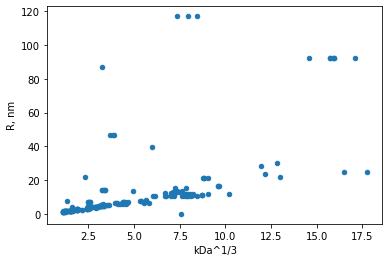

In [6]:
%matplotlib inline

data.plot.scatter('kDa^1/3', 'R, nm')

## Fit model

A more apparently linear relationship appears to be present. Fit linear regression model to find function to calculate radius from molecular weight: y=mx+c.

In [7]:
model = LinearRegression(fit_intercept=True)
model.fit(data[['kDa^1/3']], data['R, nm'])

LinearRegression()

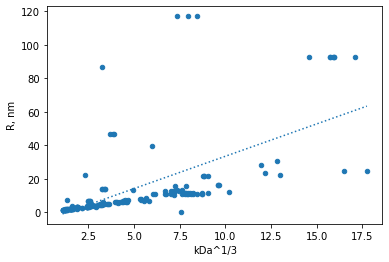

In [8]:
x_fit = pd.DataFrame([data['kDa^1/3'].min(), data['kDa^1/3'].max()])
y_pred = model.predict(x_fit)

fig, ax = plt.subplots()
data.plot.scatter('kDa^1/3', 'R, nm', ax=ax)
ax.plot(x_fit[0], y_pred, linestyle=":")

Find model intercept (c) and model gradient (m).

In [9]:
print(f'Model gradient: {model.coef_[0]}')
print(f'Model intercept: {model.intercept_}')

Model gradient: 3.8539970390926674
Model intercept: -5.036358145506588


Find R^2

In [10]:
model.score(data[['kDa^1/3']], data['R, nm'])

0.40930211169025355

Several outliers skew the linear regression and causes a relatively low R^2 value. To improve the model fit, exclude all values where y > 20nm and x > 10 kDa^1/3, as these are likely large and non-globular proteins.

In [11]:
data2 = data[data['kDa^1/3'] <= 10]
data2 = data2[data2['R, nm'] <= 20]
data2

,Da,kDa,"Radius of gyration, Å","R, nm",kDa^1/3
0,12640,1.264,14.8,1.48,1.081224
1,13700,1.370,14.8,1.48,1.110641
2,17000,1.700,14.8,1.48,1.193483
3,13300,1.330,14.5,1.45,1.099724
4,14180,1.418,16.7,1.67,1.123463
...,...,...,...,...,...
175,6602000,660.200,111.0,11.10,8.707467
176,6630000,663.000,115.0,11.50,8.719760
181,8905000,890.500,164.0,16.40,9.620803
182,8910000,891.000,164.0,16.40,9.622603


In [12]:
model2 = LinearRegression(fit_intercept=True)
model2.fit(data2[['kDa^1/3']], data2['R, nm'])

LinearRegression()

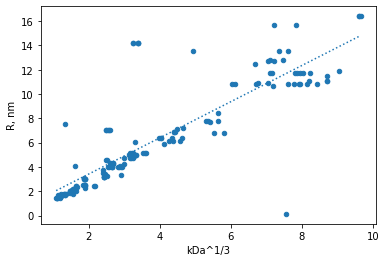

In [13]:
x_fit = pd.DataFrame([data2['kDa^1/3'].min(), data2['kDa^1/3'].max()])
y_pred = model2.predict(x_fit)

fig, ax = plt.subplots()
data2.plot.scatter('kDa^1/3', 'R, nm', ax=ax)
ax.plot(x_fit[0], y_pred, linestyle=":")

In [14]:
model2.score(data2[['kDa^1/3']], data2['R, nm'])

0.7390495897543363

R^2 is significantly improved! Solve y=mx+c:

In [15]:
print(f'Model gradient: {model2.coef_[0]}')
print(f'Model intercept: {model2.intercept_}')

Model gradient: 1.487496517653074
Model intercept: 0.4441569279568185


The function approximately describing the relationship of molecular weight (kDa) and radius (nm) of proteins becomes:

# R = 1.5(MW^1/3) + 0.5